In [8]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

# Lab 05: Modeling, Loss Functions, and Summary Statistics


In this lab, you will perform modeling on a dataset containing restaurant tips and explore loss functions and summary statistics in the process.

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**The on-time deadline is Tuesday, October 8, 11:59 PM**. As a reminder, the slip-day policy does not apply to labs. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support.

### Lab Walkthrough
In addition to the lab notebook, we have also released a prerecorded walkthrough video of the lab. This playlist includes a walkthrough for every question in the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.


**Note:** These videos were recorded in Spring 2023. There may be slight inconsistencies between the version you are viewing and the version used in the recording, but the content is identical.

In [6]:
#from IPython.display import YouTubeVideo
#YouTubeVideo("v=pSBM0W860DQ", list='PLQCcNQgUcDfo1mnau9OkAYF0jwXOvxoGq', istType = 'playlist')

### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

**Collaborators**: *list names here*

---
### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, and common `pandas` and RegEx errors.

<br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Predicting Restaurant Tips

In this lab, you will try to predict restaurant tips from a set of data in several ways:

**Question 1:** Given one piece of information—the total bill $x$—**use a linear model with $L_2$ loss** to predict the tip $\hat{y}$ as a linear function of $x$. 

**Question 2:** Given one piece of information—the total bill $x$—**use a linear model with $L_1$ loss** to predict the tip $\hat{y}$ as a linear function of $x$.

**Question 3:** Assume no information is given, use a **constant model $\hat{y} = \theta_0$ with $L_2$ loss** to predict the tip $\hat{y}$ as a summary statistic, $\theta_0$.

<br/>

First, let's load the data.

In [9]:
# Run this cell to load the data; no further action is needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

In [12]:
# Just run this cell
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

### Quick EDA/Subplots Demo

The below plot graphs the distribution of tips in this dataset, both in **absolute amounts ($)** and as a **fraction of the total bill** (post-tax, but pre-tip). `plt.subplots` below helps us plot two graphs side-by-side.

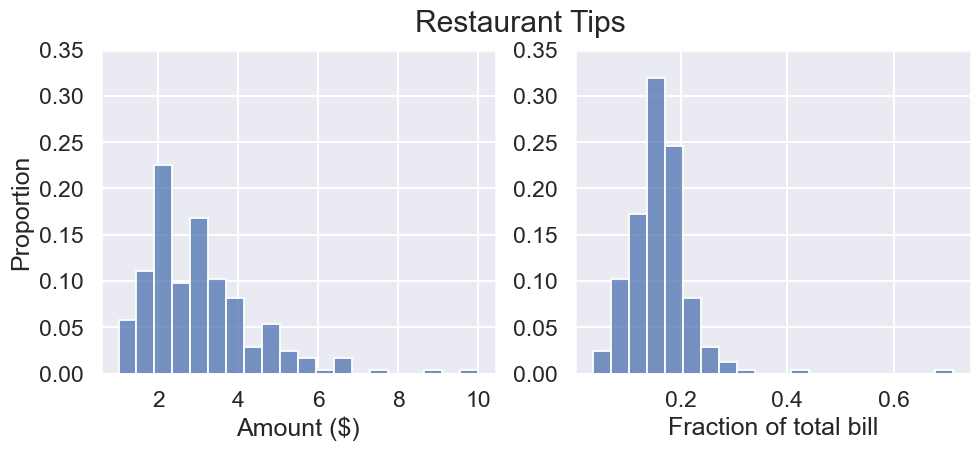

In [13]:
# Run this cell to generate the plot; no further action needed.
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
sns.histplot(tips['tip'], bins=20, stat="proportion", ax=ax[0])
sns.histplot(tips['tip']/tips['total_bill'], bins=20, stat="proportion", ax=ax[1])
ax[0].set_xlabel("Amount ($)")
ax[1].set_xlabel("Fraction of total bill")
ax[0].set_ylim((0, 0.35))
ax[1].set_ylim((0, 0.35))
ax[1].set_ylabel("") # for cleaner visualization
fig.suptitle("Restaurant Tips")
plt.show()

In this lab, we'll estimate the tip in **absolute amounts ($)**. The above plot is just to confirm your expectations about the `tips` dataset.

<br>
<hr style="border: 1px solid #fdb515;" />

# Question 1: Tips as a Linear Function of Total Bill with $L_2$ Loss

In this section, you will follow the modeling process above and use `total_bill` to compute the predicted tips. First, we identify the values we already have.

`y_tips`: Each actual tip in our dataset is $y$, which is what we call the **observed value** or **dependent variable**. We want to predict each observed value as $\hat{y}$. We'll save the observed tip values in this **NumPy array**.

`x_total_bills`: Each observed total bill in our dataset is $x$, which is what we call the **feature**, **predictor**, or **independent variable**. We want to predict each observed value using $x$. We'll save the observed total bill values (post-tax but pre-tip) in this **NumPy array**.

In [14]:
# Run this cell to define x and y array; no further action needed.
y_tips = np.array(tips['tip'])               # Array of observed tips
x_total_bills = np.array(tips['total_bill']) # Array of total bill amounts

print("total bills", x_total_bills.shape)
print("tips", y_tips.shape)

total bills (244,)
tips (244,)


Recall the steps of the modeling process covered in the lecture:

A. Define a **model.**

B. Choose a **loss function** and calculate the **average loss** on our dataset.

C. Find the best value of $\theta$, known as $\hat{\theta}$, that **minimizes** loss. There can be multiple such $\theta$ values.

D. Evaluate the model performance (not covered in this lab). 

We'll go through the first three steps of this process next.

<br/>

## A: Define a model.

We will define our model as the **linear model** that takes a single input feature, `total_bill`, $x$, and predicts the dependent variable, $\hat{y}$:

$$\large
\hat{y} = \theta_0 + \theta_1 x
$$

$\theta_0$ and $\theta_1$ are what we call **parameters**. Our modeling goal is to find the value of our parameter(s) that **best fit our data**.

We have a choice over which $\theta_0$ and $\theta_1$ we pick (using the data at hand), but ultimately we can only pick one to report, so we want to find the optimal parameter(s) $\hat{\theta_0}$ and $\hat{\theta_1}$.

Our modeling task is then to pick the best values $\theta_0 = \hat{\theta}_0$ and $\theta_1 = \hat{\theta_1}$ from our data. 

Then, given the total bill $x$, we can predict the tip as $\hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x$.

No code to write here!

<br/>

## B: Define a loss function.

Next, in order to pick our $\theta_0$ and $\theta_1$, we need to define a **loss function**, which is a measure of how well a model is able to predict the expected outcome. In other words, it measures the deviation of the observed value $y$ from the predicted value $\hat{y}$.

We will use **squared loss** (also known as the $L_2$ loss, pronounced "ell-two"). For an observed tip value $y$ (i.e., the real tip), our prediction of the tip $\hat{y}$ would give an $L_2$ loss of:

$$\large L_2(y, \hat{y}) = \large (y - \hat{y})^2 = \large (y - (\theta_0 + \theta_1 x))^2 $$


We just defined loss for a single data point. Let's extend the above function to our entire dataset by taking the **average loss** across the dataset.

Let the dataset $\mathcal{D}$ be the set of observations: $\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}$, where $(x_i, y_i)$ are the $i^{th}$ total bill and tip, respectively, in our dataset.

We can define the average loss over the dataset using squared loss (also known as **Mean Squared Error (MSE)**) as:

$$\large R(\theta_0, \theta_1) = \large \frac{1}{n} \sum_{i=1}^n L(y_i, \hat{y}_i) $$
$$= \large \frac{1}{n} \sum_{i = 1}^n(y_i - (\theta_0 + \theta_1 x_i))^2
$$

<br>

---

### Question 1a

Define the `mse_tips_linear` function which computes $R(\theta_0, \theta_1)$ as the **Mean Squared Error (MSE)** on the tips data for a linear model with parameters $\theta_0$ and $\theta_1$.

**Hint:**
* This function takes in two parameters `theta0` and `theta1`.
* You should use the `NumPy` arrays `x_total_bills` and `y_tips` defined at the beginning of Question 1.
* We've included some skeleton code, but feel free to write your own as well.

In [17]:
def mse_tips_linear(theta0, theta1):
    """
    Calculate the mean square error on the tips data for a linear model.
    
    Parameters
    ------------
    theta0 : intercept of the fitted linear model
    theta1 : slope of the fitted linear model
    
    Returns
    ------------
    The mean square error on the tips data for a linear model.
    """
    
    y_hats = theta0+theta1*x_total_bills
    return np.sum(np.square(y_tips-y_hats))/len(y_tips)
    ...

mse_tips_linear(0.9, 0.1) # Arbitrarily pick theta0 = 0.9, theta1 = 0.1

1.052336405737705

In [18]:
grader.check("q1a")

q1a results: All test cases passed!

## C: Find the $\theta_0$ and $\theta_1$ that minimize loss.

Now we can go about choosing our "best" value of $\vec{\theta} = \begin{bmatrix}\theta_0\\ \theta_1 \end{bmatrix}$, 
which we call $\hat{\theta}$, that minimizes our MSE. There are several approaches to computing $\hat{\theta}$ that we'll explore in this problem.

## Analytical Solution

In lecture, we derived the following optimal parameters $\hat{\theta}_1$ and $\hat{\theta}_0$:

$$\large \hat{\theta}_1 = r \frac{\sigma_y}{\sigma_x}$$


$$\large \hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}$$

and the prediction of the tip of the $i^{th}$ bill, $\hat{y_i}$, will be:
$$\large \hat{y}_i = \hat{\theta}_0 + \hat{\theta}_1x_i$$

where $\bar{x}$, $\bar{y}$, $\sigma_x$, $\sigma_y$ correspond to the means and standard deviations of $x$ and $y$, respectively, and $r$ is the correlation coefficient.

<br>

---

### Question 1b

Assign `x_bar`, `y_bar`, `std_x`, `std_y`, and `r`, for our dataset. 

**Hint:**

* Remember, in our case, `y` is `y_tips`, and `x` is `x_total_bills`.
* You may find `np.corrcoef` [(documentation)](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) handy in computing `r`. Note that the output of `np.corrcoef` is a matrix, not a number, so you'll need to collect the correlation coefficient by indexing in the returned matrix.

In [24]:
x_bar = np.mean(x_total_bills)
y_bar = np.mean(y_tips)
std_x = np.std(x_total_bills)
std_y = np.std(y_tips)
r = np.corrcoef(x_total_bills,y_tips)[0,1]
r

0.6757341092113641

In [25]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

---

### Question 1c

Now, set `theta0_hat` and `theta1_hat` correctly, in terms of the variables you defined above. 

In [26]:
theta1_hat = r*std_y/std_x
theta0_hat = y_bar-theta1_hat*x_bar

In [27]:
grader.check("q1c")

q1c results: All test cases passed!

<br>

---

### Question 1d

Now, use `theta0_hat` and `theta1_hat` to implement the `predict_tip_linear` function, which predicts the tip for a given total bill amount of `bill`.

In [29]:
def predict_tip_linear(bill):
    return theta0_hat+theta1_hat*bill

# Do not edit below this line.
bill = 20
print(f"""If you have a ${bill} bill, Part B's modeling process
    predicts that you will pay a tip of ${predict_tip_linear(bill):.2f}.""")

If you have a $20 bill, Part B's modeling process
    predicts that you will pay a tip of $3.02.


In [30]:
grader.check("q1d")

q1d results: All test cases passed!

## Numerical solution

Suppose we didn't have a closed-form solution to finding our optimal $\hat{\theta}$ that minimizes loss.
`scipy.optimize.minimize` is a powerful **numerical method** that can determine the optimal value of a variety of different functions. In practice, it is used to minimize functions that either lack analytical solutions or have solutions that are difficult to obtain. 

It may be overkill for our simple example, but nonetheless, we will show you how to use it, as it will become useful in the near future.

### Tutorial: `scipy.optimize.minimize`

The cell below plots some arbitrary 4th degree polynomial function. 

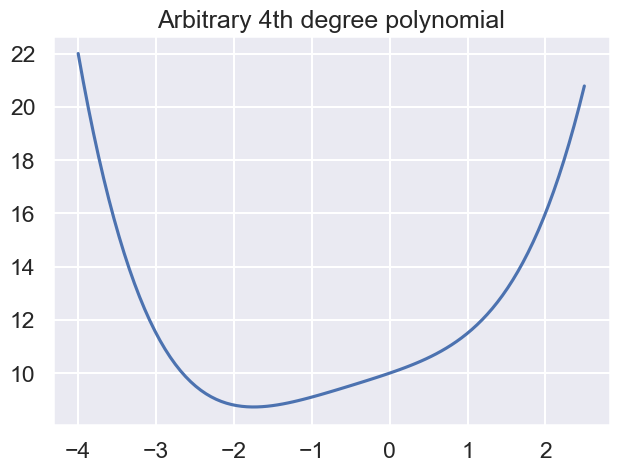

In [31]:
# Run this cell to plot a 4th degree polynomial; no further action is needed.
x_values = np.linspace(-4, 2.5, 100)

def fx(x):
    return 0.1 * x**4 + 0.2*x**3 + 0.2 * x **2 + 1 * x + 10

plt.plot(x_values, fx(x_values));
plt.title("Arbitrary 4th degree polynomial");

By looking at the plot, we see that the x that minimizes the function is slightly larger than -2. What if we want the exact value? We will demonstrate how to grab the minimum value and the optimal `x` in the following cell.

The function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it. Try running the cell below, and you will see that `minimize` seems to get the answer correct.

Note: For today, we'll let `minimize` work as if by magic. We'll discuss how `minimize` works later in the course.

In [32]:
# Run this cell to minimize fx; no further action is required.
from scipy.optimize import minimize
minimize(fx, x0 = 1.1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.728505719866614
        x: [-1.747e+00]
      nit: 6
      jac: [ 1.192e-07]
 hess_inv: [[ 5.088e-01]]
     nfev: 16
     njev: 8

**Notes:**

1. `fun`: The minimum value of the function. <br/>
2. `x`: The `x` which minimizes the function. We can index into the object returned by `minimize` to get these values. We have to add the additional `[0]` at the end because the minimizing `x` is returned as an array, but this is not necessarily the case for other attributes (i.e. `fun`), shown in the cell below. This means that `minimize` can also minimize multivariable functions, which we'll see in the second half of this lab.

In [33]:
# Run this cell to find the minimum and minimizer of fx; no further action is required.
min_result = minimize(fx, x0 = 1.1)
min_of_fx = min_result['fun']
x_which_minimizes_fx = min_result['x'][0]
min_of_fx, x_which_minimizes_fx

(8.728505719866614, -1.746827786380178)

**Initial guess**: The parameter `x0` that we passed to the `minimize` function is where the `minimize` function starts looking as it tries to find the minimum. For example, above, `minimize` started its search at $x = 1.1$ because that's where we told it to start. For the function above, it doesn't really matter what x we start at because the function is nice and has only a single local minimum. More technically, the function is nice because it is [convex](https://en.wikipedia.org/wiki/Convex_function), a property of functions that we will discuss in a later homework.

**Local minima**: `minimize` isn't perfect. For example, if we give it a function with many valleys (also known as local minima) it can get stuck. For example, consider the function below:

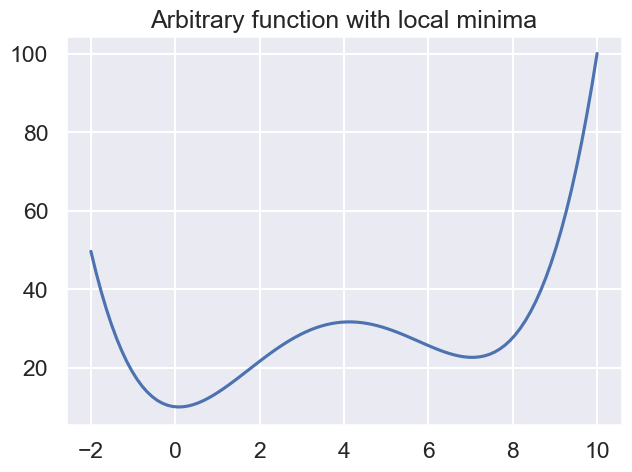

In [34]:
# Run this cell to plot fw; no further action is needed.
w_values = np.linspace(-2, 10, 100)

def fw(w):
    return 0.1 * w**4 - 1.5*w**3 + 6 * w **2 - 1 * w + 10

plt.plot(w_values, fw(w_values));
plt.title("Arbitrary function with local minima");

If we start the minimization at $w = 6.5$, we'll get stuck in the local minimum at $w = 7.03$. Note that no matter what your actual variable is called in your function (`w` in this case), the `minimize` routine still expects a starting point parameter called `x0`.

In [35]:
# Run this cell to minimize fw starting at 6.5; no further action is needed.
minimize(fw, x0 = 6.5)    # Initial w = 6.5

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 22.594302881719713
        x: [ 7.038e+00]
      nit: 4
      jac: [-3.815e-06]
 hess_inv: [[ 1.231e-01]]
     nfev: 12
     njev: 6

In [36]:
# Run this cell to minimize fw starting at 2; no further action is needed.
minimize(fw, x0 = 2)    # Initial w = 2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.957427339087772
        x: [ 8.609e-02]
      nit: 6
      jac: [-1.073e-06]
 hess_inv: [[ 8.913e-02]]
     nfev: 16
     njev: 8

The `minimize` function can minimize functions of multiple variables (useful for numerically computing $\hat{\theta}_0$ and $\hat{\theta}_1$. There's one quirk, however, which is that the function has to accept its parameters as a single list, so we will define $\vec{\theta} = \begin{bmatrix}\theta_0\\ \theta_1 \end{bmatrix}$, as single list input to the function.

For example, consider the multivariate $f(u, v) = u^2 - 2 u v - 3 v + 2 v^2$. It turns out this function's minimum is at $(1.5, 1.5)$. To minimize this function, we create `f`.

In [37]:
# Run this cell to minimize f; no further action is needed.
def f(theta):
    u = theta[0]
    v = theta[1]
    return u**2 - 2 * u * v - 3 * v + 2 * v**2

minimize(f, x0 = [0.0, 0.0]) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2.2499999999999982
        x: [ 1.500e+00  1.500e+00]
      nit: 3
      jac: [-5.960e-08  0.000e+00]
 hess_inv: [[ 1.000e+00  5.000e-01]
            [ 5.000e-01  5.000e-01]]
     nfev: 12
     njev: 4

<br/>

Now, let's use this approach to find a numerical solution to the optimal $\hat{\theta}$ that minimizes our MSE loss.

<br>

---
### Question 1e

Implement the `mse_tips_linear_list` function, which is exactly like `mse_tips_linear` defined previously except that it takes in a single list of 2 variables rather than two separate variables. For example, `mse_tips_linear_list([2, 3])` should return the same value as `mse_tips_linear(2, 3)`.

In [38]:
def mse_tips_linear_list(theta):
    """
    Calculate the mean square error on the tips data for a linear model.
    
    Parameters
    ------------
    theta : a list containing [theta0, theta1]
    
    Returns
    ------------
    The mean square error on the tips data for a linear model.
    """
    y_hats = theta[0]+theta[1]*x_total_bills
    return np.sum(np.square(y_tips-y_hats))/len(y_tips)
    

In [39]:
grader.check("q1e")

q1e results: All test cases passed!

<br>

---

### Question 1f

Now, set `min_scipy_linear` to the result of calling `minimize` to optimize the loss function you just implemented.

**Hint:** For autograding purposes, pass in the parameter `x0 = [0.0, 0.0]` to `minimize`.

In [41]:
# Call minimize with initial x0 = [0.0, 0.0]
min_scipy_linear = minimize(mse_tips_linear_list ,x0=[0.0, 0.0])
min_scipy_linear

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0360194420114932
        x: [ 9.203e-01  1.050e-01]
      nit: 3
      jac: [-4.470e-08 -2.980e-08]
 hess_inv: [[ 2.980e+00 -1.253e-01]
            [-1.253e-01  6.335e-03]]
     nfev: 15
     njev: 5

In [42]:
grader.check("q1f")

q1f results: All test cases passed!

Based on the above output from your call to `minimize`, running the following cell will set and print the values of `theta0_hat_scipy` and `theta1_hat_scipy`.

In [43]:
# Run this cell to define theta0_hat_scipy and theta1_hat_scipy; no further action is needed.
theta0_hat_scipy = min_scipy_linear['x'][0]
theta1_hat_scipy = min_scipy_linear['x'][1]
theta0_hat_scipy, theta1_hat_scipy

(0.9202703450693733, 0.10502447914641161)

<br/>

The following cell will print out the values of `theta0_hat` and `theta1_hat` computed from both methods ("analytical" refers to the analytical solution in Question 1c; "numerical" refers to the numerical solution in Question 1f). If you've done everything correctly, these should be very close to one another.

In [44]:
# Run this cell to display your result.
print('theta0_hat_numerical: ', theta0_hat_scipy)
print('theta0_hat_analytical: ', theta0_hat)
print('\n')
print('theta1_hat_numerical: ', theta1_hat_scipy)
print('theta1_hat_analytical: ', theta1_hat)
print('\n')

theta0_hat_numerical:  0.9202703450693733
theta0_hat_analytical:  0.9202696135546735


theta1_hat_numerical:  0.10502447914641161
theta1_hat_analytical:  0.10502451738435334




## Visual Solution

Feel free to look at the below 3D plot from different perspectives by changing the values of `elevation` and `azimuth` and verify that the $\hat{\theta}_0$ and $\hat{\theta}_1$ you computed using either method above minimize the MSE. In the cell below, we plot the MSE for different parameter values. Now that we have two parameters, we have a 3D MSE surface plot (two dimensions for two parameters and one dimension for MSE value).

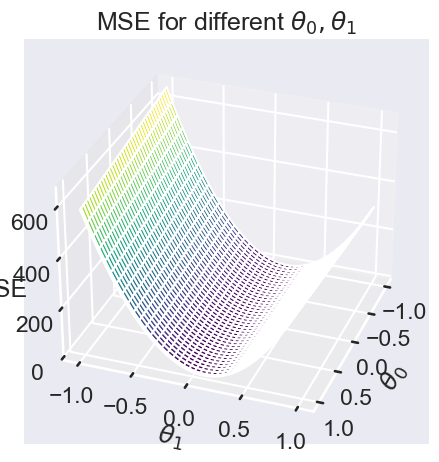

In [45]:
# Run this cell to generate the plot; no further action is needed.
from mpl_toolkits.mplot3d import Axes3D

# Feel free to play around with these values to get different perspectives of the 3D Plot
elevation = 30 # Try out: 0, 90
azimuth = 20 # Try out: 0, 45

theta0_values = np.linspace(-1, 1, 80)
theta1_values = np.linspace(-1, 1, 80)

mse_values = np.array([[mse_tips_linear(x,y) for x in theta0_values] for y in theta1_values])

# Plot 
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(theta0_values, theta1_values)
surf = ax.plot_surface(X, Y, mse_values, cmap='viridis')

ax.set_title('MSE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MSE')

ax.view_init(elev = elevation, azim = azimuth)

plt.show()

<br/>
Reflecting on the lab so far, we used a 3-step approach to find the "best" linear fit:

A. Define the linear model $\hat{y}=\theta_0 + \theta_1 x$.

B. Define "best": Define loss per datapoint ($L_2$ loss) and consequently define loss $R(\theta_0, \theta_1)$ over a given dataset as the Mean Squared Error (MSE).

C. Find the $\hat{\theta}_0$, $\hat{\theta}_1$ that minimizes the MSE $R(\theta_0, \theta_1)$ in several ways:

* **Analytically**: Use calculus to find $\hat{\theta}_0$, $\hat{\theta}_1$ that minimizes MSE $R(\theta_0, \theta_1)$. 

* **Numerically**: Create a function that returns $R([\theta_0, \theta_1])$, the MSE for the given data array for a given $[\theta_0, \theta_1]$, and use the scipy `minimize` function to find the minimizing $\hat{\theta}_0$, $\hat{\theta}_1$.


* **Visually**: Create a plot of $R(\theta_0, \theta_1)$ vs. $\theta_0$ and $\theta_1$, and eyeball the minimizing $\hat{\theta}_0$ and $\hat{\theta}_1$.

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Question 2: Tips as a Linear Function of Total Bill with $L_1$ Loss

In this (short) section, we'll consider how the optimal parameters for the **linear model** would change if we used a different loss function.


We will now use **absolute loss** (also known as the $L_1$ loss, pronounced "ell-one"). For an observed tip value $y$ (i.e., the real tip), our prediction of the tip $\hat{y}$ would give an $L_1$ loss of:

$$\large L_1(y, \hat{y}) = |y - \hat{y}|$$

<br/>

While we still define the model's **loss** as **average loss** over the dataset. Since we now use $L_1$ loss per datapoint in our dataset $\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}$, our model's loss is now known as **Mean Absolute Error** (MAE).

For the linear model $\hat{y} = \theta_0 + \theta_1 x$:


$$\large R\left(\theta_0,\theta_1\right) = \large \frac{1}{n} \sum_{i=1}^n L_1(y_i, \hat{y}_i) $$
$$ = \large \frac{1}{n} \sum_{i=1}^n |y_i - (\theta_0 + \theta_1 x)| $$

<br>

---

### Question 2a

Define the `mae_tips_linear` function which computes $R(\theta_0, \theta_1)$ as the **Mean Absolute Error (MAE)** on the tips data for a linear model with parameters $\theta_0$ and $\theta_1$.

**Hint**: 
* You should use the `NumPy` arrays `x_total_bills` and `y_tips` defined at the beginning of Question 1.
* To most efficiently compute the MAE, try to use `NumPy` functions or expressions that work for each *term* in the loss function name. 

In [46]:
def mae_tips_linear(theta0, theta1):
    """
    Calculate the Mean Absolute Error on the tips data for a linear model.
    
    Parameters
    ------------
    theta0 : intercept of the fitted linear model
    theta1 : slope of the fitted linear model
    
    Returns
    ------------
    The mean absolute error on the tips data for a linear model.
    """
    
    y_hats = theta0+theta1*x_total_bills
    return np.sum(np.abs(y_tips-y_hats))/len(y_tips)

mae_tips_linear(5.3, 2) # Arbitrarily pick a = 5.3, 2

41.87360655737705

In [47]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

## Numerical Solution

---

### Question 2b

There is no simple analytical solution but we can still solve the problem numerically and visually.

Set `min_scipy_linear_mae` to the result of calling minimize to optimize the loss function. 

**Hint:** You may need first to define a helper function or a lambda function that uses the `mae_tips_linear` function you defined earlier.

In [50]:
# Call minimize with initial x0 = [0.0, 0.0]
min_scipy_linear_mae = minimize(lambda x:mae_tips_linear(x[0],x[1]),x0 = [0.0, 0.0])
min_scipy_linear_mae

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.7373775718093477
        x: [ 5.181e-01  1.236e-01]
      nit: 8
      jac: [ 0.000e+00  1.545e-02]
 hess_inv: [[ 2.737e+00 -1.203e-01]
            [-1.203e-01  7.165e-03]]
     nfev: 201
     njev: 63

In [51]:
grader.check("q2b")

q2b results: All test cases passed!

Based on the above output from your call to `minimize`, running the following cell will set and print the values of `theta0_hat_scipy_mae` and `theta1_hat_scipy_mae`.

In [52]:
# Run this cell to define theta0_hat_scipy_mae and theta1_hat_scipy_mae, no further action needed.
theta0_hat_scipy_mae = min_scipy_linear_mae['x'][0]
theta1_hat_scipy_mae = min_scipy_linear_mae['x'][1]
theta0_hat_scipy_mae, theta1_hat_scipy_mae

(0.5180755855011097, 0.12355449942799052)

<br/>

## Visual Solution

Similar to earlier, run the following code to produce the visualization. Is the numerical solution close to what you expected?

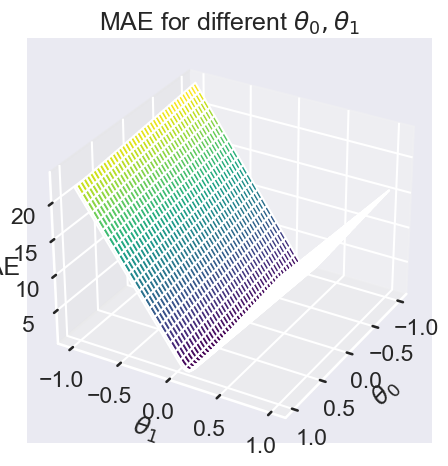

In [53]:
# Run this cell to generate the plot; no further action is needed.
from mpl_toolkits.mplot3d import Axes3D

# Feel free to play around with these values to get different perspectives of the 3D Plot
elevation = 30 # Try out: 0, 30, 90
azimuth = 30 # Try out: 0, 45

theta0_values = np.linspace(-1, 1, 80)
theta1_values = np.linspace(-1, 1, 80)

mae_values = np.array([[mae_tips_linear(x,y) for x in theta0_values] for y in theta1_values])

# Plot 
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(theta0_values, theta1_values)
surf = ax.plot_surface(X, Y, mae_values, cmap='viridis')

ax.set_title('MAE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MAE')

ax.view_init(elev = elevation, azim = azimuth)

plt.show()

<br>

## Compare MAE and MSE

---

### (Ungraded) Thought Question 2e


Try to identify any key differences you observe between the MSE and MAE plots and write them down below. This might be more fun with a partner. Note that your answer will not be graded, so don't worry about writing a detailed answer.

_Write your answer here, replacing this text._

<br/>
<hr style="border: 1px solid #fdb515;" />

# Question 3: Tips as a Constant Function of Total Bill with $L_2$ Loss

In this section, you will follow the exact same modeling process but using a different model, the **constant model**. 

Let us predict any restaurant tip using one single constant value. In other words, let's try to find the best statistic $\hat{\theta_0}$ to represent (i.e., **summarize**) the tips from our dataset.

Note: We will explore this model in an upcoming lecture; our intention for now is to build intuition before we do a deep-dive analysis. Let's get to it!

## A: Define the model

We will define our model as the **constant model**:

$$\large
\hat{y} = \theta_0
$$

In other words, regardless of any other details (i.e., features) about their meal, we will always predict our tip $\hat{y}$ as one single value: $\theta_0$.

It ignores any relationships between variables:

- For example, tips likely depend on the bill itself, time of day, how the customers feel, etc.;
- Ignoring these factors is a **simplifying assumption**.


We call the constant model a **summary statistic**, as we are determining one number that best "summarizes" a set of values.


No code to write here!

## B: Define the loss function and loss

Next, we'll define our loss function $L(y, \hat{y})$ and consequently our loss function $R(\theta_0)$.

Similar to our approach to Question 1, we'll use $L_2$ Loss and Mean Squared Error. Let the dataset $\mathcal{D}$ be the set of observations: $\mathcal{D} = \{(y_1), \ldots, (y_n)\}$, where $y_i$ are the $i^{th}$ and tip in our dataset.

Our $L_2$ Loss and Mean Squared Error are therefore:

$$\large L_2(y, \hat{y}) = \large (y - \hat{y})^2 = \large (y - \theta_0)^2 $$

$$\large R(\theta_0) = \large \frac{1}{n} \sum_{i=1}^n L(y_i, \hat{y}_i) = \large \frac{1}{n} \sum_{i = 1}^n(y_i - \theta_0)^2
$$

Notice that because our model is now the constant model $\hat{y} = \theta_0$, our final expressions for Loss and MSE are different from Question 1.


<br>

---

### Question 3a

Define the `mse_tips_constant` function which computes $R(\theta_0)$ as the **Mean Squared Error** on the tips data for a constant model with parameter $\theta_0$.


**Hints:** 
* You should use the `NumPy` arrays `y_tips` defined at the beginning of Question 1.

In [56]:
def mse_tips_constant(theta0):
    """
    Calculate the mean square error on the tips data for a constant model.
    
    Parameters
    ------------
    theta0 : fitted constant model
    
    Returns
    ------------
    The mean square error on the tips data for a constant model.
    """

    return np.sum(np.square(y_tips-theta0))/len(y_tips)

mse_tips_constant(5.3) # Arbitrarily pick a = 5.3

7.20452950819672

In [57]:
grader.check("q3a")

q3a results: All test cases passed!

## C: Find the $\theta_0$ that minimizes loss

Similar to before, we'd like to try out different approaches to finding the optimal parameter $\hat{\theta_0}$ that minimizes MSE.

## Visual Solution

In the cell below, we plot the MSE for different values of $\theta_0$:

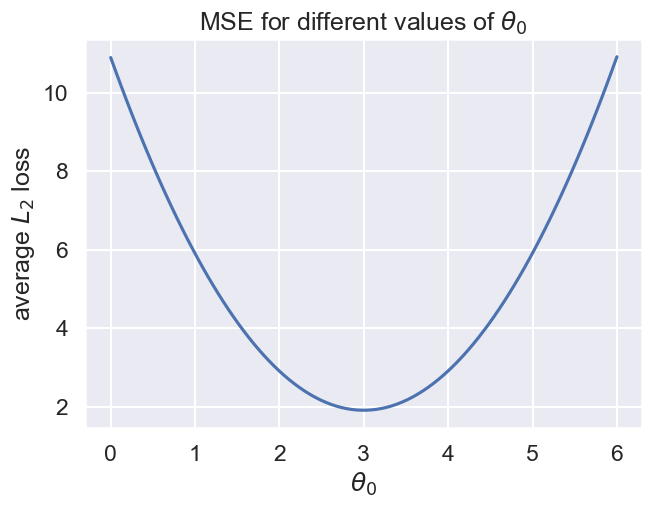

In [58]:
# Run this cell to plot MSE; no further action is needed.
theta0_values = np.linspace(0, 6, 100)
mse = [mse_tips_constant(theta) for theta in theta0_values]
plt.plot(theta0_values, mse)
plt.xlabel(r'$\theta_0$')
plt.ylabel('average $L_2$ loss')
plt.title(r'MSE for different values of $\theta_0$');

<br>

---

### Question 3b

Based on the above plot, without calculation, what is the value of $\theta_0$ that minimizes the MSE? Round your answer to the nearest integer and assign it to `theta0_hat_observed`.

In [59]:
theta0_hat_observed = 3
theta0_hat_observed

3

In [60]:
grader.check("q3b")

q3b results: All test cases passed!

<br>

## Numerical Solution

Similar to the previous questions, we can use numerical optimization to estimate the optimal parameters.

<br>

---

### Question 3c

Using the `minimize` function, assign `theta0_hat_scipy` to the value of $\theta_0$ that minimizes the MSE for our `tips` dataset. In other words, you want to find the exact minimum of the plot that you saw in the previous part.

**Notes:** 
* You should use the function you defined earlier: `mse_tips_constant`.
* For autograding purposes, assign `theta0_hat_scipy` to the value of $\theta_0$ that minimizes the MSE according to the `minimize` function, called with initial `x0 = 0.0`.

In [65]:
# Call minimize with initial x0 = 0.0.
theta0_hat_scipy = minimize(mse_tips_constant,x0 = 0.0)['x']
theta0_hat_scipy

array([2.99827873])

In [66]:
grader.check("q3c")

q3c results: All test cases passed!

<br>

## Analytical Solution

---

### Question 3d

As you saw in the lecture, we show that the value of $\theta_0$ that minimizes the MSE for the constant model is the average (mean) of the data. Assign `theta0_hat_analytical` to the mean of the observed `y_tips` values, and compare this to the values you observed in questions 3b and 3c.

In [70]:
theta0_hat_analytical = np.mean(y_tips)
theta0_hat_analytical

2.99827868852459

In [71]:
grader.check("q3d")

q3d results: All test cases passed!

Run the cell below to compare your results:

In [72]:
print('theta0_hat_observed: ', theta0_hat_observed)
print('theta0_hat_analytical: ', theta0_hat_analytical)
print('theta0_hat_numerical: ', theta0_hat_scipy)

theta0_hat_observed:  3
theta0_hat_analytical:  2.99827868852459
theta0_hat_numerical:  [2.99827873]


<br/>
Reflecting on Question 3, we used a 3-step approach to find the "best" summary statistic $\theta_0$:

A. Define the constant model $\hat{y}=\theta_0$.

B. Define "best": Define loss per datapoint ($L_2$ loss) and consequently define the model's loss $R(\theta_0)$ over a given data array as the Mean Squared Error (MSE).

C. Find the $\theta_0 = \hat{\theta_0}$ that minimizes the $R(\theta_0)$ in several ways:
* **Visually**: Create a plot of $R(\theta_0)$ vs. $\theta_0$ and eyeball the minimizing $\hat{\theta_0}$.
* **Numerically**: Create a function that returns $R(\theta_0)$ for the given data for a given $\theta_0$, and use the scipy `minimize` function to find the minimizing $\hat{\theta_0}$.
* **Analytically**: Use calculus to find $\hat{\theta_0}$ that minimizes MSE $R(\theta_0)$. Then compute $\hat{\theta_0}$ as the mean of the given data array, since this minimizes the defined $R(\theta_0)$.
    
At this point, you've hopefully convinced yourself that the mean of the data is the summary statistic that minimizes the MSE.

**Our prediction for every meal's tip**:

In [73]:
# Run this cell to define the prediction function, no futher action needed.
def predict_tip_constant():
    return theta0_hat_analytical

# Do not edit below this line.
bill = 20
print(f"""No matter what meal you have, Question 3 modeling process
    predicts that you will pay a tip of ${predict_tip_constant():.2f}.""")

No matter what meal you have, Question 3 modeling process
    predicts that you will pay a tip of $3.00.


<br>

## Compare the Constant Model and Linear Model
Both the linear model (question 1) and constant model (question 3) were optimized using the same $L_2$ loss function but predicted different values for different tips.

Run the cell below:

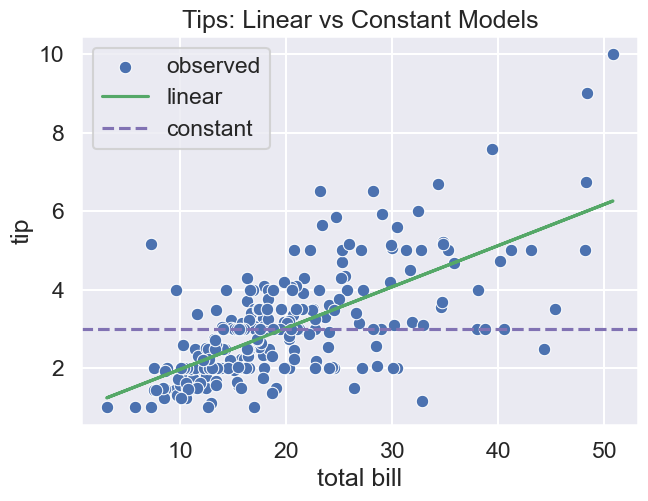

In [74]:
# Run this cell to generate linear vs constant prediction

sns.scatterplot(x = x_total_bills, y = y_tips, label='observed');

# The below plots expect that you've run all other cells before this one
plt.plot(x_total_bills, predict_tip_linear(x_total_bills), label='linear', color='g');
plt.axhline(y=predict_tip_constant(), label='constant', color='m', ls='--');

plt.legend()
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("Tips: Linear vs Constant Models");
plt.show()

Note that while we plot the tip against the total bill, the constant model doesn't use the total bill in its prediction and therefore shows up as a horizontal line.

<br/>

---

### (Ungraded) Question 3e: Thought Question

For predicting tips on this data, would you rather use the constant model or the linear model, assuming an $L_2$ loss function for both? Note that your answer will not be graded, so don't worry about writing a detailed answer.

_Write your answer here, replacing this text._

<br/>

In the not-so-distant future of this class, you will learn more quantitative metrics to compare model performance. Stay tuned!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Thor congratulates you for finishing Lab 05!

<img src='thor.jpg' width="400px" />

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSdpKA_E3b7PGqKSRqBUgSebb9bVFhRwRBv1ueisGsnKFkZkYg/viewform?usp=sf_link). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Submit this file to the Lab 05 assignment on Gradescope. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)